In [ ]:
!pip install segmentation_models_pytorch

In [7]:
import torch
from torchvision import transforms as T
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2
import csv

In [ ]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
model = torch.load('Unet-Mobilenet.pt')
model.eval()

In [65]:
def inf(img):
    t = T.Compose([T.ToTensor(), T.Normalize(mean, std)])
    img = t(img)
#     img_patches = img.unfold(1, 512, 284).unfold(2, 768, 654) 
#     img_patches  = img_patches.contiguous().view(3,-1, 512, 768) 
#     img_patches = img_patches.permute(1,0,2,3)

    with torch.no_grad():
        output = model(img.permute((1,2,0)).unsqueeze(0).cuda()).cpu()
#         output = model(img_patches.to('cuda')).cpu()
    return img_patches,output
def maskToCV(mask,colors):
    cv_mask = np.zeros((512,768,3),dtype=np.uint8)
    for label,color in colors.items():
        cv_mask[mask==label] = color
    return cv_mask

In [34]:
img = Image.open("/home/ad/stanford/1.png")

In [32]:
    t = T.Compose([T.ToTensor(), T.Normalize(mean, std)])
    img = t(img)
    img_patches = img.unfold(1, 512, 284).unfold(2, 768, 654) 
    img_patches  = img_patches.contiguous().view(3,-1, 512, 768) 
#     img_patches = img_patches.permute(1,0,2,3)

In [33]:
img_patches.shape

torch.Size([3, 4, 512, 768])

In [38]:
empty = torch.zeros((1,3,512,512)).cuda()

In [50]:
output[0].shape

torch.Size([23, 512, 768])

In [54]:
torch.argmax(output[0],dim=0)

tensor([[ 3,  3,  3,  ...,  3,  3,  1],
        [ 1,  3,  1,  ...,  1,  1,  1],
        [ 1,  1, 10,  ..., 22,  1,  1],
        ...,
        [ 1,  1,  1,  ...,  1,  1,  1],
        [ 1,  1,  1,  ...,  1,  1,  1],
        [ 1,  1,  1,  ...,  1,  1,  1]])

In [ ]:
with torch.no_grad():
    output = model(empty.to('cuda')).cpu()
masked = torch.argmax()    
masked = model(empty)

In [40]:
masked.shape

torch.Size([1, 23, 512, 512])

In [62]:
empty = torch.zeros(1,3,768,1024)

In [64]:
img.shape

(1079, 1422, 3)

In [71]:
inp.shape

torch.Size([1, 3, 1079, 1422])

In [79]:
img = cv2.imread("/home/ad/stanford/1.png")
img = cv2.resize(img, (768,512))
# t = T.Compose([T.ToTensor(), T.Normalize(mean, std)])
# img = t(img)
# inp = img.unsqueeze(0).cuda()
# with torch.no_grad():
#     output = model(inp).cpu()
# #         output = model(img_patches.to('cuda')).cpu()

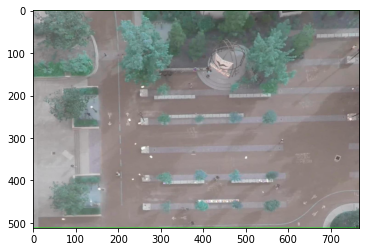

In [82]:
plt.imshow(img)

In [66]:
img = cv2.imread("/home/ad/stanford/1.png")

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_patches, output = inf(img)
masked = torch.argmax(output, dim=1)

RuntimeError: Given groups=1, weight of size [32, 3, 3, 3], expected input[1, 1079, 1422, 3] to have 3 channels, but got 1079 channels instead

In [16]:
colors = {}
with open('class_dict_seg.csv') as csvfile:
    code_reader = csv.reader(csvfile, delimiter=',')
    headers = next(code_reader, None)
    for i,row in enumerate(code_reader):
        colors[i] = ((int(row[1]),int(row[2]),int(row[3])))

In [17]:
cv_mask = maskToCV(masked[0],colors)

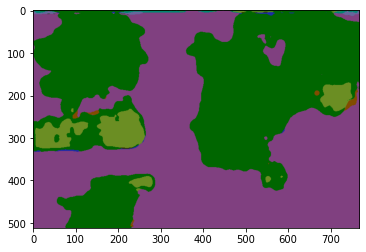

In [14]:
plt.imshow(cv_mask)

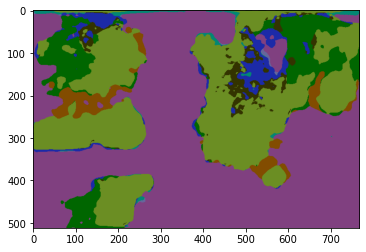

In [18]:
plt.imshow(cv_mask)

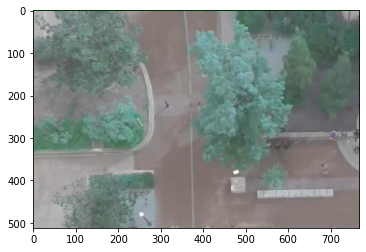

In [27]:
plt.imshow(img[:512,:768])

In [22]:
im = img_patches[0].transpose((1,2,0))

TypeError: transpose() received an invalid combination of arguments - got (tuple), but expected one of:
 * (name dim0, name dim1)
 * (int dim0, int dim1)


In [21]:
plt.imshow(img_patches[0].transpose((1,2,0)))

TypeError: transpose() received an invalid combination of arguments - got (tuple), but expected one of:
 * (name dim0, name dim1)
 * (int dim0, int dim1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


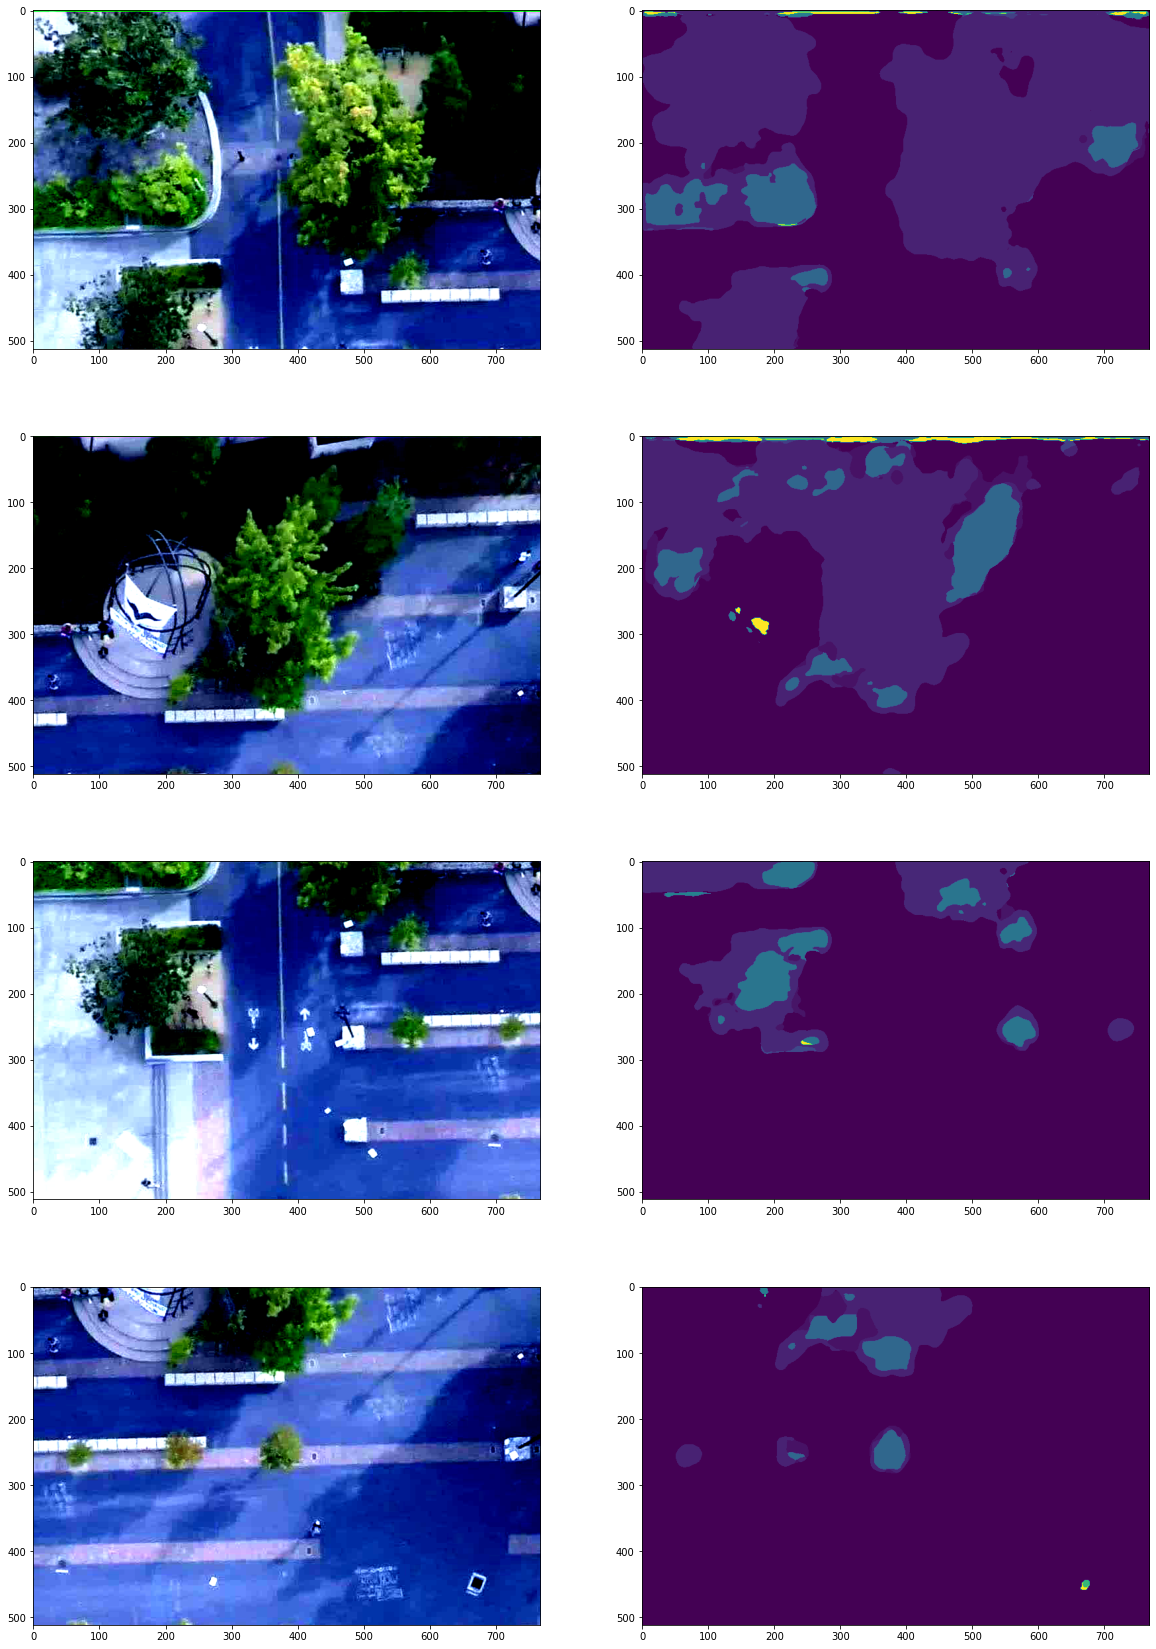

In [25]:
fig, ax = plt.subplots(4,2, figsize=(20,30))
for i in range(4):
    open_cv_image = np.array(img_patches[i].permute(1,2,0)) 
#     open_cv_image = open_cv_image[:, :, ::-1].copy() 
#     open_cv_image = open_cv_image[:, :, ::-1].copy() 
    ax[i,0].imshow(open_cv_image)
#     ax[i,0].imshow(img_patches[i].permute(1,2,0))
    ax[i,1].imshow(masked[i])

In [ ]:
fig, (ax1,  ax3) = plt.subplots(1,2, figsize=(20,10))
# image = image.squeeze(0)
# image = image.cpu()
image = image.permute(1,2,0)
ax1.imshow(image)
ax1.set_title('Picture');

# image = image.squeeze(0)

ax3.imshow(masked.cpu())
# ax3.set_title('UNet-MobileNet | mIoU {:.3f}'.format(score3))
# ax3.set_axis_off()